In [268]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

%matplotlib inline

In [269]:
data=pd.read_csv("pokemon.csv")
data.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0


In [270]:
columns=["pokedex_number","name", "type1", "type2", "generation", 
         "is_legendary", "weight_kg", "height_m", "base_total","hp","attack", 
         "defense","sp_attack", "sp_defense", "speed", 'capture_rate']
columns

['pokedex_number',
 'name',
 'type1',
 'type2',
 'generation',
 'is_legendary',
 'weight_kg',
 'height_m',
 'base_total',
 'hp',
 'attack',
 'defense',
 'sp_attack',
 'sp_defense',
 'speed',
 'capture_rate']

In [271]:
df=data[columns]
df.head()

,pokedex_number,name,type1,type2,generation,is_legendary,weight_kg,height_m,base_total,hp,attack,defense,sp_attack,sp_defense,speed,capture_rate
0,1,Bulbasaur,grass,poison,1,0,6.9,0.7,318,45,49,49,65,65,45,45
1,2,Ivysaur,grass,poison,1,0,13.0,1.0,405,60,62,63,80,80,60,45
2,3,Venusaur,grass,poison,1,0,100.0,2.0,625,80,100,123,122,120,80,45
3,4,Charmander,fire,NaN,1,0,8.5,0.6,309,39,52,43,60,50,65,45
4,5,Charmeleon,fire,NaN,1,0,19.0,1.1,405,58,64,58,80,65,80,45


In [272]:
missing_cols=df.columns[df.isna().any()].tolist()
missing_cols

['type2', 'weight_kg', 'height_m']

In [273]:
for col in missing_cols:
    print("Number of missing values in {col} are {val}"
          .format(col=col, val=df[col].isna().sum()))

Number of missing values in type2 are 384
Number of missing values in weight_kg are 20
Number of missing values in height_m are 20


In [274]:
df['type2'].fillna("none", inplace=True)
df['weight_kg'].fillna("0", inplace=True)
df['height_m'].fillna("0", inplace=True)
df.isna().any().any()

C:\Users\Win 10\Anaconda3\lib\site-packages\pandas\core\generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


False

In [275]:
df.head(10)

,pokedex_number,name,type1,type2,generation,is_legendary,weight_kg,height_m,base_total,hp,attack,defense,sp_attack,sp_defense,speed,capture_rate
0,1,Bulbasaur,grass,poison,1,0,6.9,0.7,318,45,49,49,65,65,45,45
1,2,Ivysaur,grass,poison,1,0,13,1,405,60,62,63,80,80,60,45
2,3,Venusaur,grass,poison,1,0,100,2,625,80,100,123,122,120,80,45
3,4,Charmander,fire,none,1,0,8.5,0.6,309,39,52,43,60,50,65,45
4,5,Charmeleon,fire,none,1,0,19,1.1,405,58,64,58,80,65,80,45
5,6,Charizard,fire,flying,1,0,90.5,1.7,634,78,104,78,159,115,100,45
6,7,Squirtle,water,none,1,0,9,0.5,314,44,48,65,50,64,43,45
7,8,Wartortle,water,none,1,0,22.5,1,405,59,63,80,65,80,58,45
8,9,Blastoise,water,none,1,0,85.5,1.6,630,79,103,120,135,115,78,45
9,10,Caterpie,bug,none,1,0,2.9,0.3,195,45,30,35,20,20,45,255


In [278]:
single_type=0
dual_type=0
for i in df.index:
    if df["type2"][i]=="none":
        single_type+=1
    else:
        dual_type+=1
print("Number of single type pokemon are {s} and the number of dual type \
      pokemon are {d}".format(s=single_type, d=dual_type))

Number of single type pokemon are 384 and the number of dual type       pokemon are 417


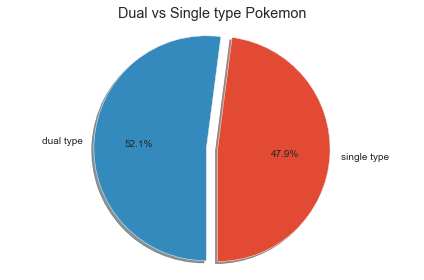

In [279]:
labels="single type", "dual type"
sizes=[single_type, dual_type]
explode=(0,0.1)
plt.pie(sizes, labels=labels, explode=explode,autopct='%1.1f%%',shadow=True,
        startangle=270)
plt.axis('equal')
plt.title('Dual vs Single type Pokemon')
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Distribution of Primary Pokemon type')

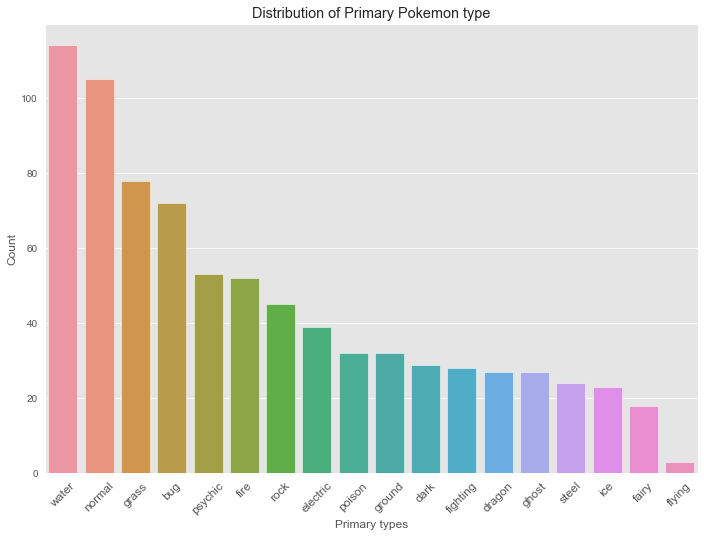

In [280]:
ind_count = pd.value_counts(df['type1'])

fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.set_style("whitegrid")

ax = sns.barplot(x=ind_count.index, y=ind_count, data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, fontsize = 12)
ax.set(xlabel='Primary types', ylabel='Count')
ax.set_title('Distribution of Primary Pokemon type')

Text(0.5, 1.0, 'Distribution of Secondary Pokemon type')

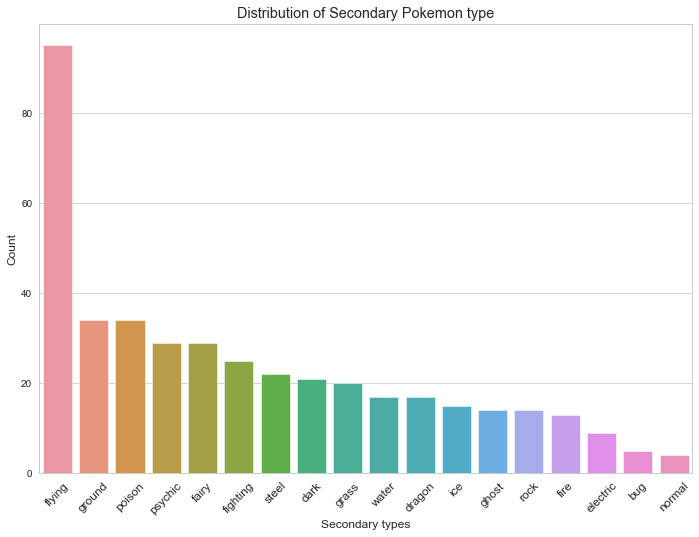

In [281]:
ind_count=pd.value_counts(df['type2'])
ind_count=ind_count.drop("none")

fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.set_style("whitegrid")

ax = sns.barplot(x=ind_count.index, y=ind_count, data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, fontsize = 12)
ax.set(xlabel='Secondary types', ylabel='Count')
ax.set_title('Distribution of Secondary Pokemon type')

Text(0.5, 1.0, 'Distribution of Pokemon type(including primary and secondary)')

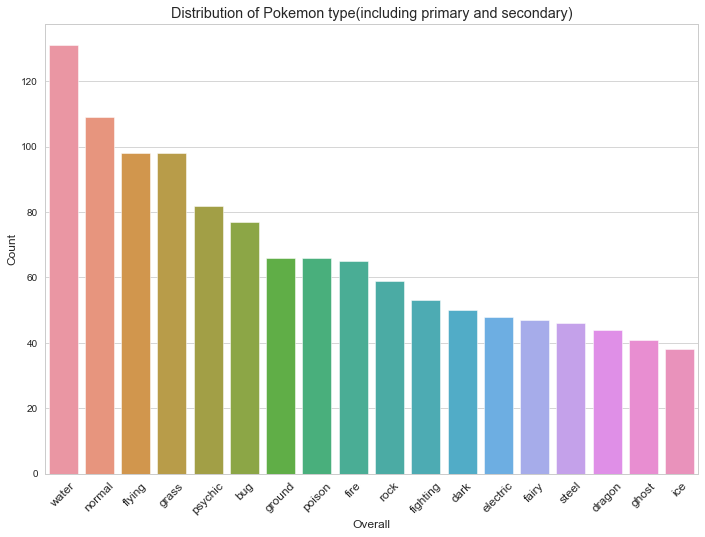

In [282]:
type1=pd.value_counts(df['type1'])
type2=ind_count=pd.value_counts(df['type2'])
overall=type1+type2
overall=overall.drop("none")
overall=overall.sort_values(ascending=False)

fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.set_style("whitegrid")

ax = sns.barplot(x=overall.index, y=overall, data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, fontsize = 12)
ax.set(xlabel='Overall', ylabel='Count')
ax.set_title('Distribution of Pokemon type(including primary and secondary)')

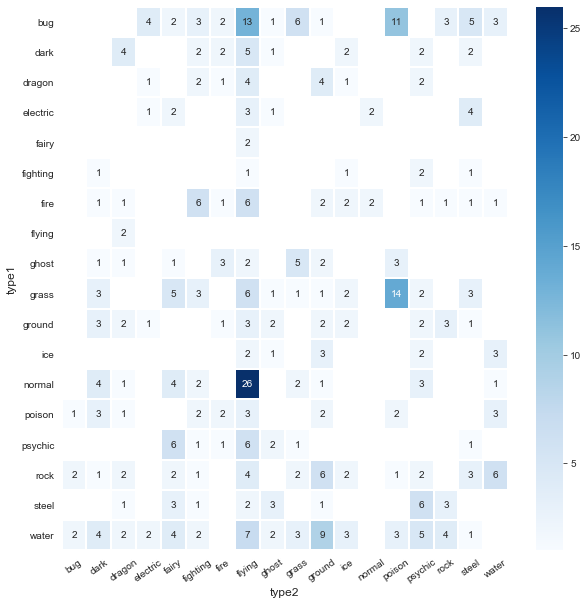

In [323]:
plt.subplots(figsize=(10, 10))

sns.heatmap(
    df[df['type2']!='none'].groupby(['type1', 'type2']).size().unstack(),
    linewidths=1,
    annot=True,
    cmap="Blues"
)

plt.xticks(rotation=35)
plt.show()

In [284]:
df["capture_rate"]
df["capture_rate"][773]=30
df["capture_rate"]=pd.to_numeric(df["capture_rate"])

C:\Users\Win 10\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Win 10\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 1.0, 'Relationship between Base stats total and Catch rate')

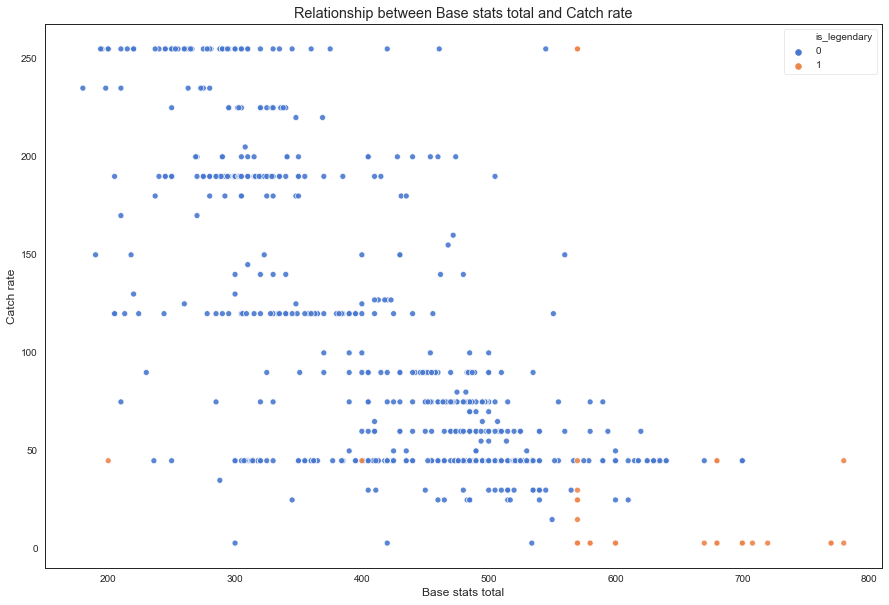

In [311]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
sns.set_style("white")
X=df['base_total']
Y=df["capture_rate"]
ax = sns.scatterplot(x=X, y=Y, data=df,
                     hue=df['is_legendary'], alpha=.9, palette="muted")
ax.set(xlabel='Base stats total', ylabel='Catch rate')
ax.set_title('Relationship between Base stats total and Catch rate')

C:\Users\Win 10\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Win 10\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Text(0.5, 1.0, 'Relationship between Height and Weight')

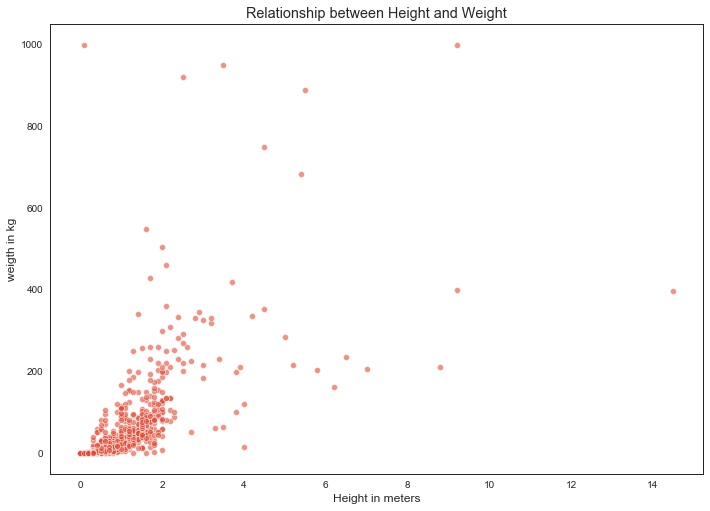

In [312]:
df['height_m']=pd.to_numeric(df['height_m'])
df['weight_kg']=pd.to_numeric(df['weight_kg'])
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.set_style("white")
X=df['height_m']
Y=df['weight_kg']
ax = sns.scatterplot(x=X, y=Y, data=df,
                     alpha=.6, palette="muted")
ax.set(xlabel='Height in meters', ylabel='weigth in kg')
ax.set_title('Relationship between Height and Weight')

In [313]:
print("The tallest pokemon are:")
tall=df['name'][df['height_m']>9].tolist()
for i in tall:
    print(i)

print("\nThe heaviest pokemon are:")
heavy=df['name'][df['weight_kg']>900].tolist()
for i in heavy:
    print(i)


The tallest pokemon are:
Steelix
Wailord
Celesteela

The heaviest pokemon are:
Groudon
Mudsdale
Cosmoem
Celesteela


[Text(0.5, 0, 'Height in meters')]

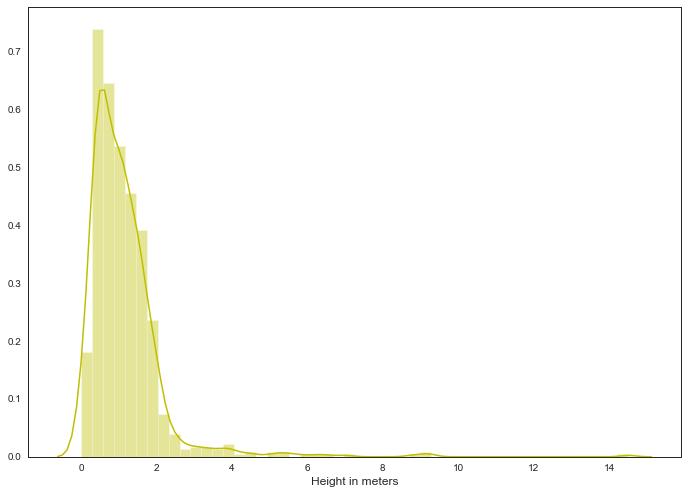

In [314]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.set_style("white")

ax= sns.distplot(df['height_m'], color="y")
ax.set(xlabel='Height in meters')

[Text(0.5, 0, 'Weigth in kg')]

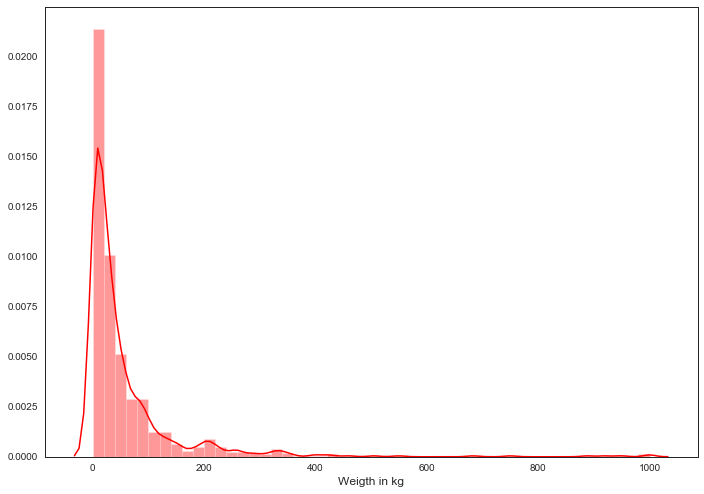

In [315]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.set_style("white")

ax= sns.distplot(df['weight_kg'], color="r")
ax.set(xlabel='Weigth in kg')

[Text(0, 0.5, 'Defense stat'), Text(0.5, 0, 'Attack stat')]

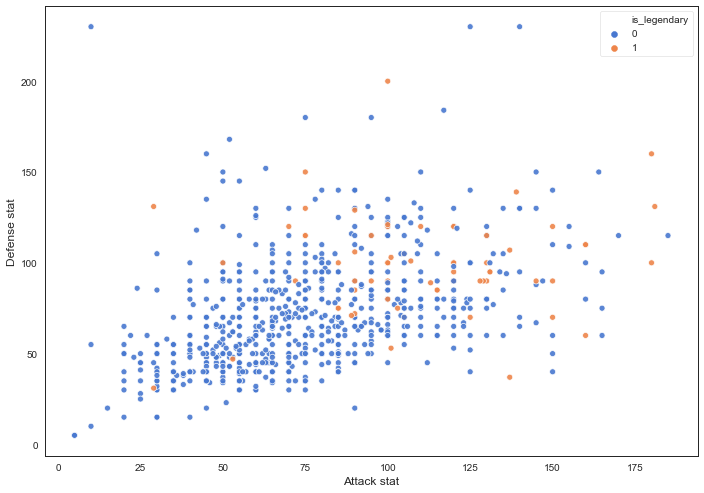

In [316]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.set_style("white")
X=df['attack']
Y=df['defense']
ax = sns.scatterplot(x=X, y=Y, data=df,  
                     hue=df['is_legendary'], 
                     alpha=.9, palette="muted")
ax.set(xlabel='Attack stat', ylabel='Defense stat')

In [317]:
print("The pokemon with highest attack stat are:")
tall=df['name'][df['attack']>175].tolist()
for i in tall:
    print(i)

print("\nThe pokemon with highest defense stat are:")
heavy=df['name'][df['defense']>200].tolist()
for i in heavy:
    print(i)


The pokemon with highest attack stat are:
Heracross
Groudon
Rayquaza
Kartana

The pokemon with highest defense stat are:
Steelix
Shuckle
Aggron


[Text(0, 0.5, 'Special Defence stat'), Text(0.5, 0, 'Special Attack stat')]

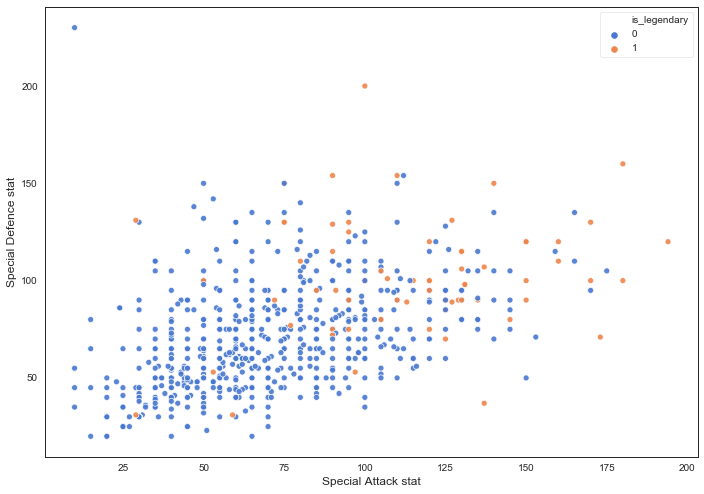

In [318]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.set_style("white")
X=df['sp_attack']
Y=df['sp_defense']
ax = sns.scatterplot(x=X, y=Y, data=df,  
                     hue=df['is_legendary'], 
                     alpha=.9, palette="muted")
ax.set(xlabel='Special Attack stat', ylabel='Special Defence stat')

In [357]:
print("The pokemon with highest special attack stat are:")
tall=df['name'][df['sp_attack']>175].tolist()
for i in tall:
    print(i)

print("\nThe pokemon with highest special defense stat are:")
heavy=df['name'][df['sp_defense']>190].tolist()
for i in heavy:
    print(i)


The pokemon with highest special attack stat are:
Mewtwo
Kyogre
Rayquaza

The pokemon with highest special defense stat are:
Shuckle
Regice


[Text(0.5, 0, 'Speed')]

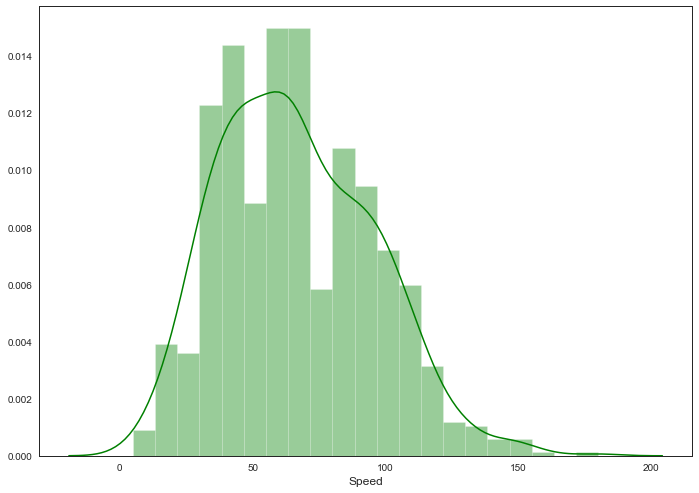

In [352]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.set_style("white")

ax= sns.distplot(df['speed'], color="g")
ax.set(xlabel='Speed')

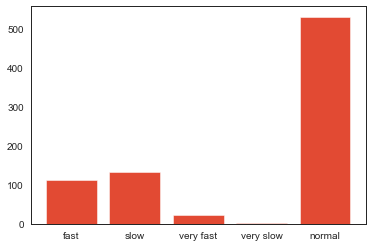

In [373]:
mean= df['speed'].describe()[1]
sd= df['speed'].describe()[2]
fast_pokemon=[]
slow_pokemon=[]
very_fast_pokemon=[]
very_slow_pokemon=[]
normal_pokemon=[]
for i in df.index:
    if(df.speed[i]>mean+(2*sd)):
        very_fast_pokemon.append(df['name'][i])
    elif(df.speed[i]<mean-(2*sd)):
        very_slow_pokemon.append(df['name'][i])
    elif(df.speed[i]>mean+sd):
         fast_pokemon.append(df['name'][i])
    elif(df.speed[i]<mean-sd):
         slow_pokemon.append(df['name'][i])
    else:
         normal_pokemon.append(df['name'][i])
speed_levels=['fast','slow','very fast',
              'very slow' ,'normal']
speed_count = [len(fast_pokemon), len(slow_pokemon), len(very_fast_pokemon)
               ,len(very_slow_pokemon),len(normal_pokemon)]
plt.bar(speed_levels,speed_count)
plt.show()

In [378]:
print('Fastest Pokemon: {}'.format(df.name[df['speed'].idxmax()] ))
print('Slowest Pokemon: {}'.format(df.name[df['speed'].idxmin()] ))

Fastest Pokemon: Deoxys
Slowest Pokemon: Shuckle


[Text(0.5, 0, 'Speed')]

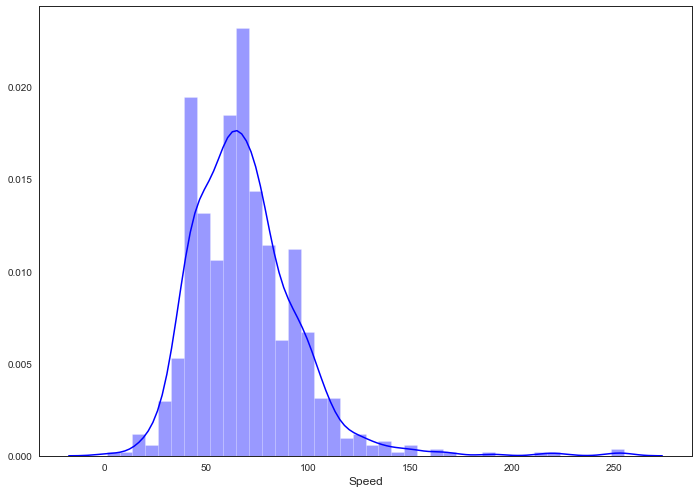

In [375]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.set_style("white")

ax= sns.distplot(df['hp'], color="b")
ax.set(xlabel='Speed')

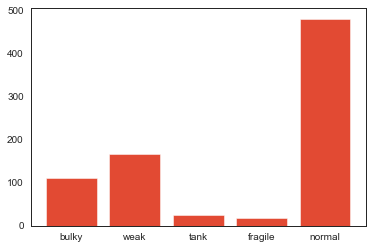

In [377]:
mean= df['hp'].describe()[1]
sd= df['hp'].describe()[2]
bulky=[]
weak=[]
tank=[]
fragile=[]
normal_pokemon=[]
for i in df.index:
    if(df.speed[i]>mean+(2*sd)):
        tank.append(df['name'][i])
    elif(df.speed[i]<mean-(2*sd)):
        fragile.append(df['name'][i])
    elif(df.speed[i]>mean+sd):
         bulky.append(df['name'][i])
    elif(df.speed[i]<mean-sd):
         weak.append(df['name'][i])
    else:
         normal_pokemon.append(df['name'][i])
hp_levels=['bulky','weak','tank',
              'fragile' ,'normal']
hp_count = [len(bulky), len(weak), len(tank),len(fragile),
               len(normal_pokemon)]
plt.bar(hp_levels,hp_count)
plt.show()

In [379]:
print('The tankiest Pokemon: {}'.format(df.name[df['hp'].idxmax()] ))
print('The most fragile Pokemon: {}'.format(df.name[df['hp'].idxmin()] ))

The tankiest Pokemon: Blissey
The most fragile Pokemon: Shedinja


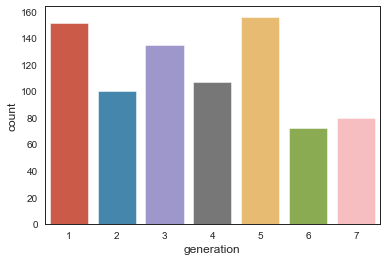

In [381]:
ax = sns.countplot(x="generation", data=df)

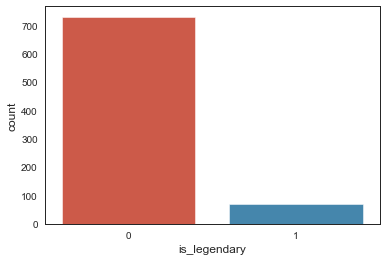

In [382]:
ax = sns.countplot(x="is_legendary", data=df)

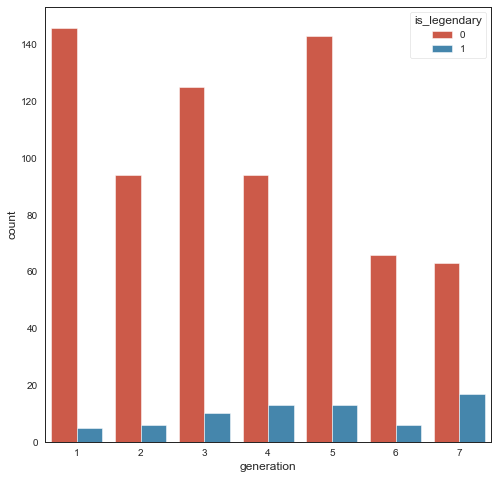

In [384]:
f, ax = plt.subplots(figsize=(8, 8))
ax = sns.countplot(x="generation", hue = 'is_legendary', data=df )

3      none
4      none
6      none
7      none
8      none
9      none
10     none
22     none
23     none
24     none
28     none
29     none
31     none
32     none
34     none
35     none
53     none
54     none
55     none
56     none
57     none
58     none
59     none
60     none
62     none
63     none
64     none
65     none
66     none
67     none
       ... 
715    none
724    none
725    none
727    none
728    none
733    none
734    none
735    none
738    none
743    none
744    none
745    none
748    none
749    none
752    none
753    none
760    none
761    none
762    none
763    none
765    none
770    none
771    none
772    none
774    none
781    none
788    none
789    none
795    none
799    none
Name: type2, Length: 384, dtype: object